<a href="https://colab.research.google.com/github/NguyenMinhThangNMT/HomeWorks/blob/main/Tipping_in_restaurant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import numpy as np

import skfuzzy.control as ctrl

universe= np.linspace(0, 10, 61) 
universe1=np.linspace (10, 31, 61)

food=ctrl.Antecedent(universe, 'food') 
service = ctrl.Antecedent(universe,'service')
tip=ctrl.Consequent(universe1,'tip')

names=['VP', 'P', 'AV', 'G', 'VG'] 
food.automf(names=names)
service.automf(names=names)
tip.automf(names=names)

In [24]:
rule0=ctrl.Rule(antecedent=((food['VP'] & service[ 'VP']) |

(food['P'] & service['VP']) |

(food['VP'] & service['P'])), consequent=tip['VP'], label='rule VP')

rule1=ctrl.Rule(antecedent=((food['VP'] & service['AV'])|
(food['VP'] & service['G'])|
(food['P'] & service['P']) |
 (food['P'] & service['AV']) |

(food['AV' ] & service['P']) |

(food['AV'] & service['VP']) |

(food['G'] & service['VP'])),

consequent=tip['P'], label='rule P')

In [27]:
rule2 = ctrl.Rule(antecedent=((food [ 'VP'] & service['VG']) |

(food['P'] & service['G']) | 

(food['AV'] & service['AV'])|

(food['G'] & service['P']) |

(food['VG'] & service['VP'])),

consequent=tip['AV'], label='rule AV')

In [29]:
rule3 = ctrl.Rule (antecedent=((food ['P'] & service['VG']) | 
(food['AV'] & service['VG']) |

(food['AV'] & service['G']) |

(food['G'] & service['G']) |

(food['G'] & service['AV']) |

(food['VG'] & service['AV']) |

(food['VG' ] & service['P'])),

consequent=tip['G'], label='rule G')

In [30]:
rule4= ctrl.Rule (antecedent=((food['G'] & service['VG']) |

(food['VG'] & service['VG']) |

(food [ 'VG'] & service['G'])),

consequent=tip[ 'VG'], label='rule VG')

In [32]:
system =ctrl.ControlSystem(rules=[rule0, rule1, rule2, rule3, rule4])

sim = ctrl.ControlSystemSimulation(system, flush_after_run=61*61 +1)

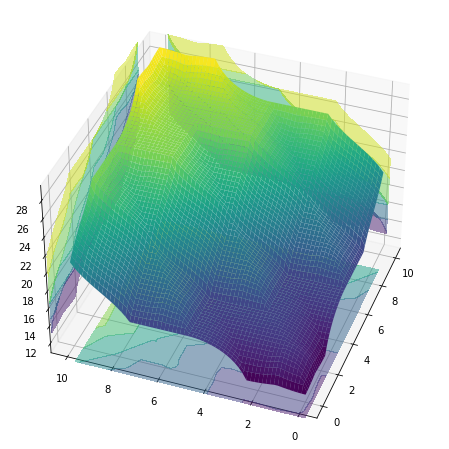

In [34]:
upsampled = np.linspace(0, 10, 61) 
x, y = np.meshgrid (upsampled, upsampled) 
z = np. zeros_like(x)

for i in range(61):

  for j in range(61): 
    sim.input['food'] = x[i, j]

    sim.input['service'] = y[i, j]

    sim.compute()

    z[i, j] = sim.output['tip']

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=8.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=9, cmap='viridis', alpha=0.5)

cset = ax.contourf(x, y, z, zdir='x', offset=11, cmap='viridis', alpha=0.5) 
cset = ax.contourf(x, y, z, zdir='y', offset=11, cmap='viridis', alpha=0.5)

ax.view_init(38, 200)